<a href="https://colab.research.google.com/github/supriyamk2/Machine-learning/blob/main/text_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%%capture
!pip install datasets

In [4]:
%%capture
!pip install transformers

In [5]:
%%capture
!pip install umap-learn

In [6]:
from datasets import load_dataset

In [8]:
data = load_dataset("csv", data_files={"train":'train (1).csv', 'test':'test (2).csv'}
                    )

Using custom data configuration default-14513419eb9627de


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-14513419eb9627de/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
data

DatasetDict({
    train: Dataset({
        features: ['Description', 'label'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['Description', 'label'],
        num_rows: 2000
    })
})

In [10]:
import torch
import torch.nn.functional as F

In [11]:
from transformers import AutoTokenizer

In [12]:
model_ckpt = "distilbert-base-uncased"

In [13]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [14]:
from transformers import DistilBertTokenizer


In [15]:
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [16]:
def tokenize(batch):
    return tokenizer(batch["Description"], padding=True, truncation=True)

In [17]:
data_encoded = data.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [18]:
print(data_encoded["train"].column_names)

['Description', 'label', 'input_ids', 'attention_mask']


In [19]:
data

DatasetDict({
    train: Dataset({
        features: ['Description', 'label'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['Description', 'label'],
        num_rows: 2000
    })
})

In [20]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
from transformers import TFAutoModel

In [22]:
tf_model = TFAutoModel.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [23]:
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [24]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [25]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [26]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [27]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [28]:
def extract_hidden_states(batch):
    
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
   
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}


In [29]:
data_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

In [30]:
data_hidden = data_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [31]:
data_hidden['train'].column_names

['Description', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [32]:
data_hidden['test'].column_names

['Description', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [33]:
import numpy as np

X_train = np.array(data_hidden["train"]["hidden_state"])
X_valid = np.array(data_hidden["test"]["hidden_state"])
y_train = np.array(data_hidden["train"]["label"])
y_valid = np.array(data_hidden["test"]["label"])
X_train.shape, X_valid.shape

((3000, 768), (2000, 768))

In [34]:
X_train.shape

(3000, 768)

In [35]:
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler


X_scaled = MinMaxScaler().fit_transform(X_train)

mapper = umap.UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,X,Y,label
0,13.174141,5.570994,0
1,-1.049727,1.682030,1
2,15.769308,8.766109,0
3,5.431338,-9.445529,1
4,15.466897,0.225473,0


In [36]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)


0.967

In [37]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid) 

0.685

In [38]:
labels = ["Not Fashion", "Fashion"]

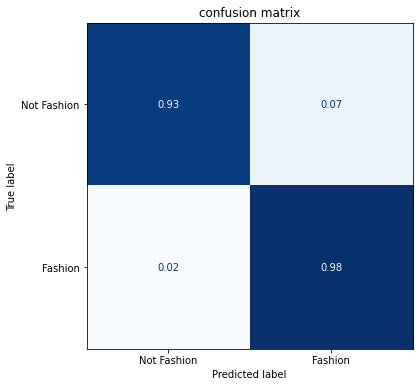

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [40]:
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'pre_classi

In [41]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [45]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [46]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(data_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-fashion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [47]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=data_encoded["train"],
                  eval_dataset=data_encoded["test"],
                  tokenizer=tokenizer)

Cloning https://huggingface.co/PriaPillai/distilbert-base-uncased-finetuned-fashion into local empty directory.


In [48]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.397700,0.169983,0.972500,0.972446
2,0.118200,0.082103,0.980000,0.980067


TrainOutput(global_step=94, training_loss=0.25433606955599275, metrics={'train_runtime': 18.9798, 'train_samples_per_second': 316.125, 'train_steps_per_second': 4.953, 'total_flos': 15523523280000.0, 'train_loss': 0.25433606955599275, 'epoch': 2.0})

In [49]:
preds_output = trainer.predict(data_encoded["test"])

In [50]:
preds_output.metrics

{'test_accuracy': 0.98,
 'test_f1': 0.9800666546982816,
 'test_loss': 0.08210280537605286,
 'test_runtime': 2.1503,
 'test_samples_per_second': 930.086,
 'test_steps_per_second': 14.881}

In [51]:
y_preds = np.argmax(preds_output.predictions, axis=1)

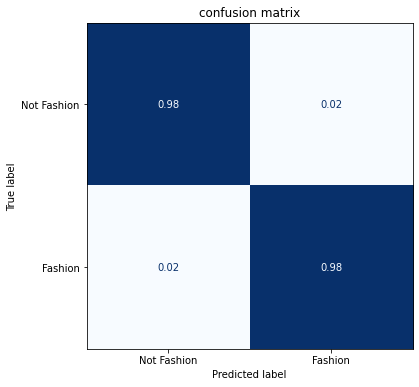

In [52]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [53]:
#fine-tuning keras

In [54]:
from transformers import TFAutoModelForSequenceClassification

tf_model = (TFAutoModelForSequenceClassification
            .from_pretrained(model_ckpt, num_labels=num_labels))

In [55]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")

In [57]:
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = data_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True,collate_fn= data_collator,
    batch_size=batch_size)
tf_eval_dataset = data_encoded["test"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,collate_fn= data_collator,
    batch_size=batch_size)

In [58]:
import tensorflow as tf

tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy())

tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

Epoch 1/2
46/46 [==============================] - 32s 255ms/step - loss: 0.2535 - sparse_categorical_accuracy: 0.8872 - val_loss: 0.0813 - val_sparse_categorical_accuracy: 0.9805
Epoch 2/2
46/46 [==============================] - 10s 211ms/step - loss: 0.0778 - sparse_categorical_accuracy: 0.9783 - val_loss: 0.0713 - val_sparse_categorical_accuracy: 0.9835


In [59]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [61]:
data_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

data_encoded["test"] = data_encoded["test"].map(
    forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [80]:
data_encoded.set_format("pandas")
cols = ["Description", "label", "predicted_label", "loss"]
df_test = data_encoded["test"][:][cols]

In [81]:
df_test

,Description,label,predicted_label,loss
0,white purple letter,1,1,0.008624
1,small green watch,0,1,2.466990
2,green dress,0,0,0.064893
3,gray blue hat,0,0,0.062183
4,red green shoe,0,0,0.062557
...,...,...,...,...
1995,gold white silver necklace,0,0,0.067080
1996,black brown dark open eye,1,1,0.008162
1997,pink bag,0,0,0.075993
1998,young asian white smiling wall,1,1,0.008716


In [86]:
trainer.push_to_hub(commit_message="Training completed!")

Upload file pytorch_model.bin:   0%|          | 3.34k/255M [00:00<?, ?B/s]

Upload file runs/May06_18-45-32_6e1aa6279f2e/1651862750.1332662/events.out.tfevents.1651862750.6e1aa6279f2e.70…

Upload file training_args.bin: 100%|##########| 3.05k/3.05k [00:00<?, ?B/s]

Upload file runs/May06_18-45-32_6e1aa6279f2e/events.out.tfevents.1651862750.6e1aa6279f2e.70.0:  73%|#######3  …

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/PriaPillai/distilbert-base-uncased-finetuned-fashion
   8aed80d..b704c73  main -> main

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/PriaPillai/distilbert-base-uncased-finetuned-fashion
   b704c73..a0c6021  main -> main



'https://huggingface.co/PriaPillai/distilbert-base-uncased-finetuned-fashion/commit/b704c7371786c966bc5df5f9be6d0c7d472fa91e'

In [7]:
from transformers import pipeline


model_id = "PriaPillai/distilbert-base-uncased-finetuned-fashion"
classifier = pipeline("text-classification", model=model_id)


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [29]:
preds = classifier(text, return_all_scores=True)

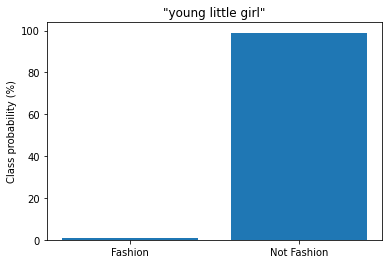

In [30]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{text}"')
plt.ylabel("Class probability (%)")
plt.show()

In [56]:
labels = ['Fashion', 'Not Fashion']

In [51]:
data = pd.read_csv("description.csv")

In [52]:
data = data[5000:5100]

In [41]:
data = data['Description']

In [45]:
ls = list(data)

In [71]:
preds = classifier(ls, return_all_scores=False)

In [92]:
preds[1]['label']

'LABEL_1'

In [96]:
ls = []
for d in preds:
  ls.append(d['label'])

In [98]:
data['label'] = ls

In [103]:
data.loc[data['label'] == 'LABEL_1', 'Category'] = 'Not Fashion'

In [105]:
data.loc[data['label'] == 'LABEL_0', 'Category'] = 'Fashion'

In [107]:
data[70:]

,Unnamed: 0,Description,Category,label
5070,5070,purple black necklace,Fashion,LABEL_0
5071,5071,blond brown head,Not Fashion,LABEL_1
5072,5072,standing purple doll,Not Fashion,LABEL_1
5073,5073,big large blue fence,Not Fashion,LABEL_1
5074,5074,green blue pillow,Not Fashion,LABEL_1
5075,5075,white blue sky,Not Fashion,LABEL_1
5076,5076,big blue large net,Not Fashion,LABEL_1
5077,5077,blue green bow,Not Fashion,LABEL_1
5078,5078,wood white wall,Not Fashion,LABEL_1
5079,5079,white blue background,Not Fashion,LABEL_1
